# **Unlocking the Secrets of Film Success: A Comprehensive Analysis of Movie Data**
    
    By Miguel Jackson, John Wiseheart, and Owen Nkurunziza

**INTRODUCTION**

This project delves into the fascinating world of movie profitability.
The film industry is a captivating blend of art and commerce, where box office success can make or break a production.
Understanding the factors that contribute to a movie's financial performance is a complex but crucial puzzle.

We aim to leverage the power of machine learning to uncover the secrets behind a film's financial success.
Machine learning, allows us to analyze vast amounts of data and identify patterns.
By applying these algorithms to movie data, we hope to shed light on the hidden forces that drive profitability.

We’re looking to provide valuable insights for the film industry.
Studios, producers, and marketers can leverage this knowledge for better decision-making and maximizing success.
bold text




**DATA**

Source: This dataset is retrieved from a public source specializing in movie information:
        https://www.kaggle.com/datasets/alessandrolobello/the-ultimate-film-statistics-dataset-for-ml
            
Variables: Our dataset encompasses a rich set of features that can influence a movie's financial performance:
Movie Details: Title, release year, genres, and runtime.
Production Information: Director's birth year and production budget.
Audience Reception: Average movie rating, number of user votes, and critical approval index.
Financial Performance: Domestic gross, worldwide gross, total gross (combined domestic and worldwide), and a binary variable indicating profitability (profitable).
    
Descriptive Statistics:  
The dataset includes information for over 4,000 movies.
Movie runtime ranges from under 100 minutes to over 3 hours.
Average ratings and approval index suggest a generally positive audience and critical reception.


# **Cleansing, Pre-Processing & Transformation Overview**

Data cleaning notebook in attached file



# **Technology and Analysis**

In [ ]:
import pandas as pd
import numpy as np
import sklearn
from sklearn import (cluster,
                     datasets,
                     decomposition,
                     discriminant_analysis,
                     dummy,
                     ensemble,
                     feature_selection as ftr_sel,
                     linear_model,
                     metrics,
                     model_selection as skms,
                     multiclass as skmulti,
                     naive_bayes,
                     neighbors,
                     pipeline,
                     preprocessing as skpre,
                     svm,
                     tree)
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.svm import SVC


In [ ]:
MVDF = pd.read_csv('cleaned_movie_data.csv')

In [ ]:
MVDF

,runtime_minutes,director_birthYear,movie_averageRating,movie_numerOfVotes,approval_Index,Production budget $,month,profitable,Action,Adventure,...,Music,Musical,Mystery,News,Romance,Sci-Fi,Sport,Thriller,War,Western
0,192.0,1954,7.8,277543.0,7.061101,460000000,12,1,1,1,...,0,0,0,0,0,0,0,0,0,0
1,181.0,1954,8.4,1143642.0,8.489533,400000000,4,1,1,1,...,0,0,0,0,0,0,0,0,0,0
2,137.0,1960,6.6,533763.0,6.272064,379000000,5,1,1,1,...,0,0,0,0,0,0,0,0,0,0
3,141.0,1964,7.3,870573.0,7.214013,365000000,4,1,1,1,...,0,0,0,0,0,1,0,0,0,0
4,149.0,1954,8.4,1091968.0,8.460958,300000000,4,1,1,1,...,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4375,100.0,1970,7.2,110078.0,6.017902,65000,5,1,0,0,...,0,0,0,0,0,0,0,0,0,0
4376,98.0,1968,6.6,7986.0,4.231464,50000,8,1,0,0,...,0,0,0,0,1,0,0,0,0,0
4377,93.0,1973,4.9,1593.0,2.526405,50000,3,1,0,0,...,0,0,0,0,1,0,0,0,0,0
4378,98.0,1986,6.2,14595.0,4.242085,50000,11,1,0,0,...,0,0,0,0,1,0,0,0,0,0


In [ ]:
# making target column is last
columns = [col for col in MVDF.columns if col != 'profitable']
# Append 'x' at the end of the list
columns.append('profitable')
MVDF = MVDF[columns]

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before opera

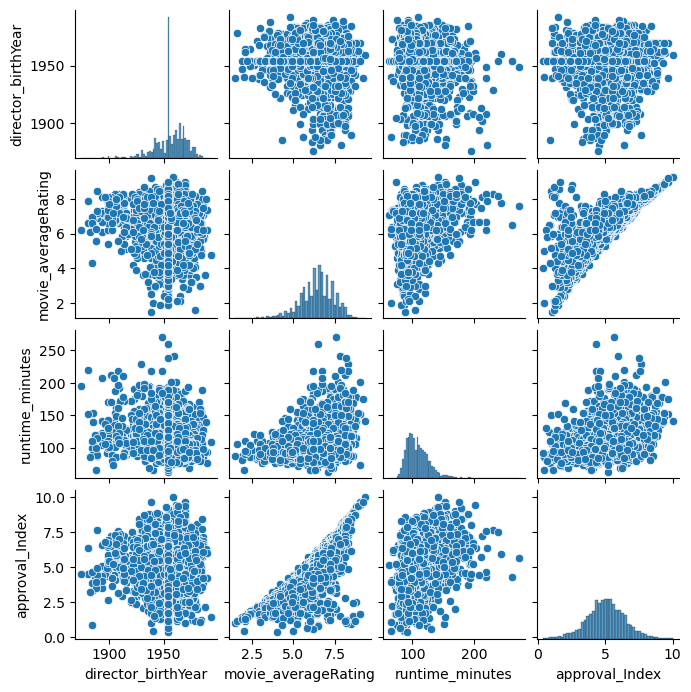

In [ ]:
# pair PLot of some of the variables
sns.pairplot(MVDF[['director_birthYear', 'movie_averageRating', 'runtime_minutes', 'approval_Index']],
             height=1.75)
# plots look pretty noisy but you can make out some positive relationships in places you might expect



In [ ]:
#train test split and D tree object creation
mdata = MVDF.iloc[:, :-1]
mtarget = MVDF.iloc[:, -1]

X_train, X_test, y_train, y_test = train_test_split(mdata, mtarget, test_size=0.33, random_state=48)



dtc = tree.DecisionTreeClassifier()

In [ ]:
fitdtc  = dtc.fit(X_train, y_train)
preddtc = fitdtc.predict(X_test)

In [ ]:
# feature importance

X_train.columns

featuresi = dtc.feature_importances_

top5 = featuresi.argsort()[-5:][::-1]

top5f = [X_train.columns[i] for i in top5]

top5f

 # interesting, number of votes seems to be the most important feature which makes sense as it is basically a stat for popularity,
 # director birth year is unexpected.


['movie_numerOfVotes',
 'Production budget $',
 'director_birthYear',
 'approval_Index',
 'runtime_minutes']

In [ ]:
# creating conf matrix
cony = confusion_matrix(y_test, preddtc)

print("Accuracy:", accuracy_score(y_test,preddtc))
print("Confusion Matrix:")
print(cony)

print(classification_report(y_test, preddtc))



Accuracy: 0.8049792531120332
Confusion Matrix:
[[ 104  144]
 [ 138 1060]]
              precision    recall  f1-score   support

           0       0.43      0.42      0.42       248
           1       0.88      0.88      0.88      1198

    accuracy                           0.80      1446
   macro avg       0.66      0.65      0.65      1446
weighted avg       0.80      0.80      0.80      1446



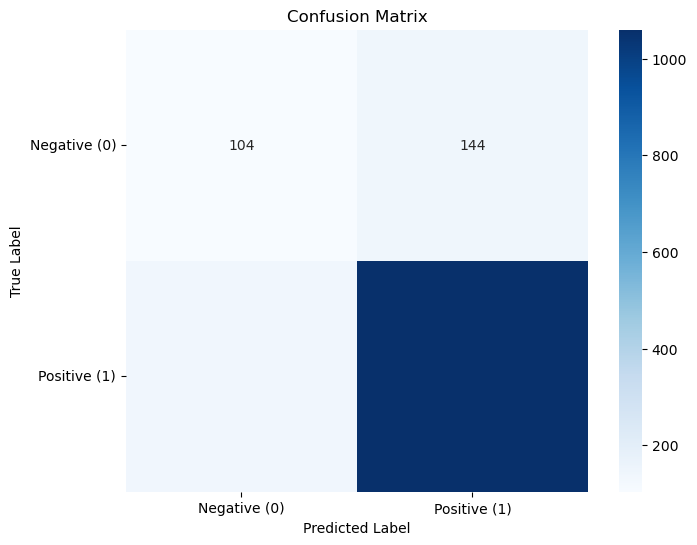

In [ ]:
#plotting matrix

plt.figure(figsize=(8, 6))
sns.heatmap(cony, annot=True, fmt="d", cmap='Blues', square=True)

plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
tick_marks = np.arange(2) + 0.5
plt.xticks(tick_marks, ['Negative (0)', 'Positive (1)'], rotation=0)
plt.yticks(tick_marks, ['Negative (0)', 'Positive (1)'], rotation=0)
plt.show()

In [ ]:
# The model was accurate more often than not, with an accuracy of 80 percent
# when it was wrong, it gave an almost even number of false negative to false positive
# I could not get numbers I see when I simply print the matrix to show up on the bottom squares of the chart, that was a technical challenge for me.


In [ ]:


# my first choice was actually to do support vector here but it kept crashing my computer I couldn't get it to work so that

# was another technical challenge


In [ ]:
# creating Logistic regression model
loggy = linear_model.LogisticRegression()

In [ ]:
fitlog  = loggy.fit(X_train, y_train)
predlog = fitlog.predict(X_test)

In [ ]:
cony2 = confusion_matrix(y_test, predlog)

print("Accuracy:", accuracy_score(y_test,predlog))
print("Confusion Matrix:")
print(cony2)

print(classification_report(y_test, predlog))

Accuracy: 0.8278008298755186
Confusion Matrix:
[[  21  227]
 [  22 1176]]
              precision    recall  f1-score   support

           0       0.49      0.08      0.14       248
           1       0.84      0.98      0.90      1198

    accuracy                           0.83      1446
   macro avg       0.66      0.53      0.52      1446
weighted avg       0.78      0.83      0.77      1446



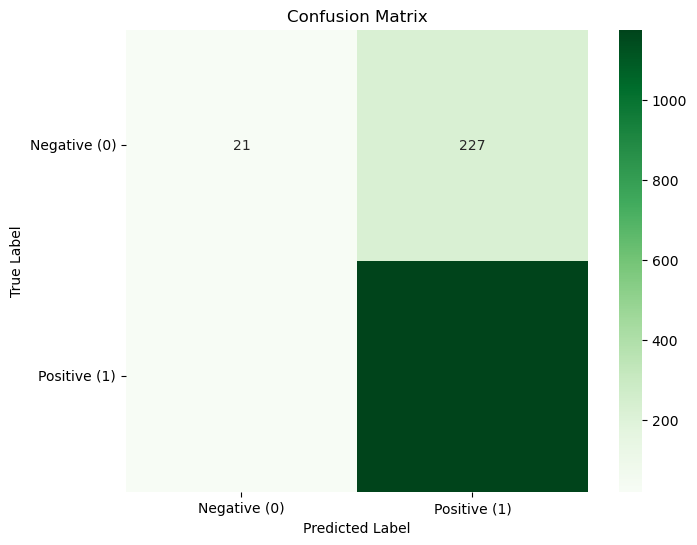

In [ ]:
plt.figure(figsize=(8, 6))
sns.heatmap(cony2, annot=True, fmt="d", cmap='Greens', square=True)

plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
tick_marks = np.arange(2) + 0.5
plt.xticks(tick_marks, ['Negative (0)', 'Positive (1)'], rotation=0)
plt.yticks(tick_marks, ['Negative (0)', 'Positive (1)'], rotation=0)
plt.show()

In [ ]:
# the big difference between the interpretations seems to be that the logistic regression model
# had a lot more false positives but very few false negatives or negative guesses
# at all for that matter.

In [ ]:

# comparing the models using CV
from sklearn.model_selection import KFold


kfold = KFold(n_splits=10, shuffle=True, random_state=42)

accuracies_dtree = cross_val_score(dtc, X_train, y_train, cv=kfold, scoring='accuracy')
accuracies_logreg = cross_val_score(loggy, X_train, y_train, cv=kfold, scoring='accuracy')

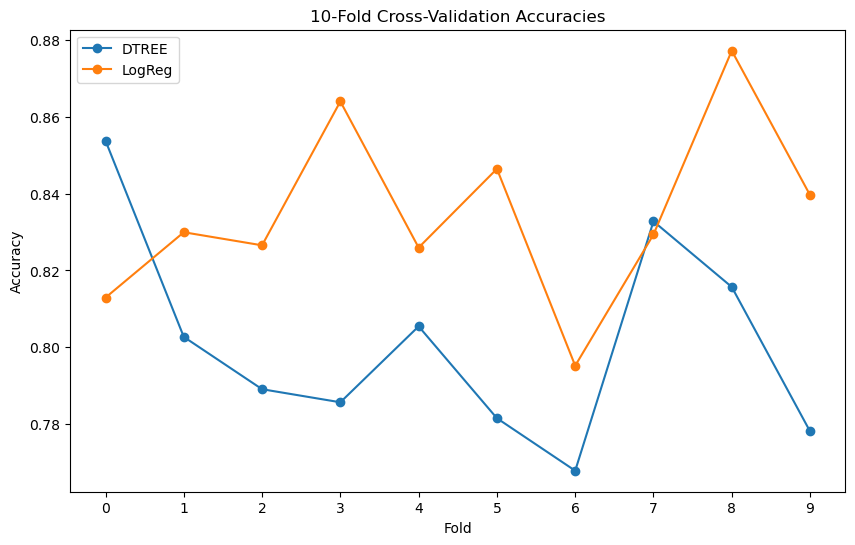

In [ ]:

plt.figure(figsize=(10, 6))
plt.plot(accuracies_dtree, label='DTREE', marker='o')
plt.plot(accuracies_logreg, label='LogReg', marker='o')

plt.title('10-Fold Cross-Validation Accuracies')
plt.xlabel('Fold')
plt.ylabel('Accuracy')
plt.xticks(range(10))
plt.legend()


plt.show()

In [ ]:
# the logistic regresssion model out performed the descision tree model at almost every fold. One caveat is that accuracy may not be the best
# measure of accuracy but between this and the way the model performed more consistently in that it guessed wrong more consistently
# the logistic regression works best just out of the box, given our data set.

# **Business Insights**

Feature Importance Insights: The analysis revealed that the number of votes a movie receives, the production budget, and the director's birth year are among the top features influencing movie profitability. For instance, high voter engagement might indicate strong audience interest, while a larger budget could allow for higher production values and more extensive marketing campaigns.

Therefore with this insight, the business can prioritize allocating resources towards factors that have a significant impact on movie profitability. For instance, they may choose to invest in promoting movies with high voter engagement or allocate larger budgets to projects helmed by experienced directors.

Based on the analysis, the project recommends implementing the Logistic Regression model for predicting movie profitability due to its consistent performance and better handling of false negatives.

By adopting the Logistic Regression model, the business can improve the accuracy of its predictions and make more informed decisions regarding which movies to invest in. For instance, they can use the model's predictions to prioritize projects with a higher likelihood of profitability, thereby maximizing returns on investment and minimizing financial risks.

By leveraging these specific insights and recommendations, the business can enhance its decision-making processes and increase the likelihood of success in the movie industry.  